In [6]:
%load_ext autoreload
%autoreload 2
from xrayproject.utils import load_train, load_masks
import xrayproject.utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
path_image = '../raw_data/raw_PRC/CXR_png/'
path_mask = '../raw_data/raw_PRC/CXR_mask/'

masks, targets, ID = load_masks(50, get_all = False, get_random = True, balanced = True, path = path_mask)

Using path:  ../raw_data/raw_PRC/CXR_mask/
Using bucket 
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0439_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0658_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0447_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0517_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0469_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0619_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0406_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0389_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0608_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0377_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0618_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0433_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0552_1_mas

In [8]:
images, ID = load_train(ID, path=path_image)

Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0433_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0655_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0124_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0260_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0058_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0380_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0284_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0340_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0104_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0240_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0024_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0469_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0078_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0552_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0517_1

In [4]:
ID

[478,
 539,
 426,
 575,
 410,
 568,
 551,
 512,
 367,
 607,
 610,
 657,
 630,
 566,
 539,
 549,
 536,
 596,
 539,
 548,
 612,
 542,
 479,
 606,
 548,
 112,
 114,
 225,
 283,
 180,
 10,
 8,
 19,
 270,
 125,
 317,
 281,
 79,
 79,
 35,
 261,
 118,
 251,
 155,
 161,
 89,
 164,
 167,
 244,
 297]

In [5]:
for mask in masks:
    if type(mask) == int:
        print(mask)

In [6]:
len(masks)

50

[478,
 539,
 426,
 575,
 410,
 568,
 551,
 512,
 367,
 607,
 610,
 657,
 630,
 566,
 539,
 549,
 536,
 596,
 539,
 548,
 612,
 542,
 479,
 606,
 548,
 112,
 114,
 225,
 283,
 180,
 10,
 8,
 19,
 270,
 125,
 317,
 281,
 79,
 79,
 35,
 261,
 118,
 251,
 155,
 161,
 89,
 164,
 167,
 244,
 297]

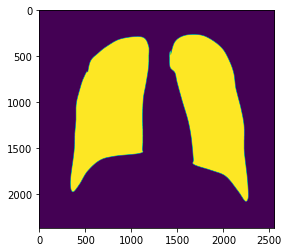

In [7]:
import matplotlib.pyplot as plt

plt.imshow(masks[0])
ID

NameError: name 'img' is not defined

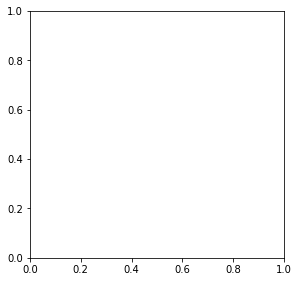

In [8]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(img[i])



In [ ]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

In [ ]:
import tensorflow as tf
image_norm_list = []
mask_norm_list = []
for image, mask in zip(images, masks):
    image_norm, mask_norm = normalize(image, mask)
    image_norm_list.append(image_norm)
    mask_norm_list.append(mask_norm)

In [ ]:
mask_norm_list[1].shape

In [ ]:
images[1].shape

In [ ]:
plt.imshow(tf.image.resize(masks[1], (128, 128)))


In [ ]:
plt.imshow(tf.image.resize(image_norm_list[1], (128,128)))

In [ ]:
t_im = images[1]
t_ma = masks[1]
t_im.shape

In [ ]:
t_ma.shape

In [ ]:
import numpy as np

np.unique(t_ma[:,])

In [ ]:
np.sum(t_ma[:,])/(255*(t_ma.shape[0] * t_ma.shape[1]))

In [ ]:
def fraction(i):
    return np.sum(masks[i])/(255*(images[i].shape[0] * images[i].shape[1]))

fractions = np.array([fraction(i) for i in range(len(masks))])
print(fractions.max(), fractions.min(), fractions.mean(), fractions.std())

In [ ]:
import numpy as np
plt.imshow(t_im[:,:,0:1]*t_ma)

In [ ]:
plt.imshow(image_norm_list[1])

In [ ]:
plt.imshow(t_ma)